In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# impport the data set
# The dataset is from Kaggle Credit Card Fraud Dataset. Please download it from: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('.\data\creditcard.csv')

In [3]:
# summary of the data set
df.shape

(284807, 31)

In [4]:
# peek the first a few data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Count the number of occurrences for each class (0 = non-fraud, 1 = fraud)
class_counts = df['Class'].value_counts()

# Print the counts for 0 and 1
print(class_counts)

# Optionally, you can separate the counts if needed
count_non_fraud = class_counts[0]  # Count of non-fraudulent transactions (Class = 0)
count_fraud = class_counts[1]      # Count of fraudulent transactions (Class = 1)

print(f"Non-Fraudulent Transactions (0): {count_non_fraud}")
print(f"Fraudulent Transactions (1): {count_fraud}")

Class
0    284315
1       492
Name: count, dtype: int64
Non-Fraudulent Transactions (0): 284315
Fraudulent Transactions (1): 492


In [6]:
# Loop through each column in the dataframe
for column in df.columns:
    # Get the min and max values for the current column
    min_value = df[column].min()
    max_value = df[column].max()
    
    # Display the results in one line
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")


Column: Time, Min: 0.0, Max: 172792.0
Column: V1, Min: -56.407509631329, Max: 2.45492999121121
Column: V2, Min: -72.7157275629303, Max: 22.0577289904909
Column: V3, Min: -48.3255893623954, Max: 9.38255843282114
Column: V4, Min: -5.68317119816995, Max: 16.8753440335975
Column: V5, Min: -113.743306711146, Max: 34.8016658766686
Column: V6, Min: -26.1605059358433, Max: 73.3016255459646
Column: V7, Min: -43.5572415712451, Max: 120.589493945238
Column: V8, Min: -73.2167184552674, Max: 20.0072083651213
Column: V9, Min: -13.4340663182301, Max: 15.5949946071278
Column: V10, Min: -24.5882624372475, Max: 23.7451361206545
Column: V11, Min: -4.79747346479757, Max: 12.0189131816199
Column: V12, Min: -18.6837146333443, Max: 7.8483920756446
Column: V13, Min: -5.79188120632084, Max: 7.12688295859376
Column: V14, Min: -19.2143254902614, Max: 10.5267660517847
Column: V15, Min: -4.49894467676621, Max: 8.87774159774277
Column: V16, Min: -14.1298545174931, Max: 17.3151115176278
Column: V17, Min: -25.1627993

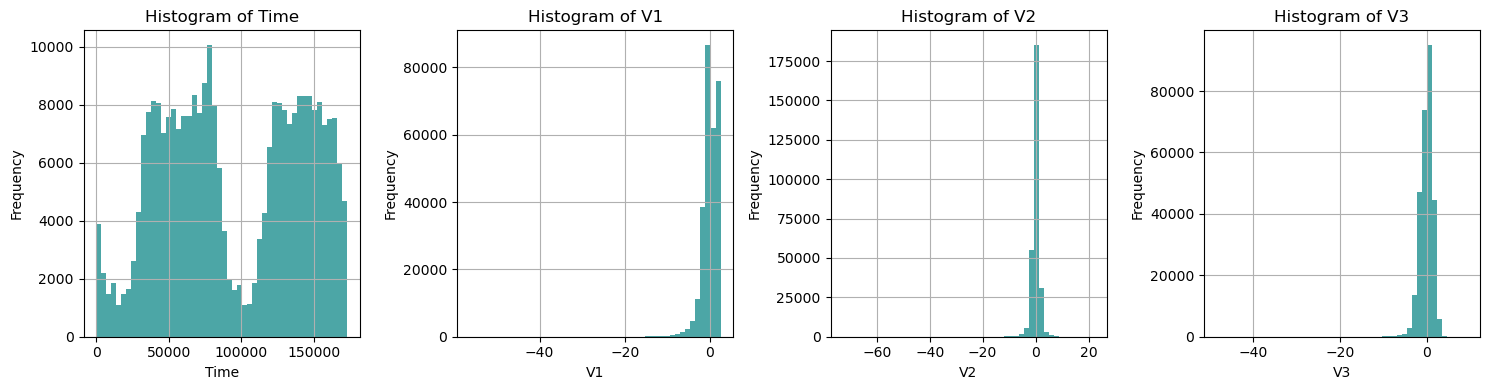

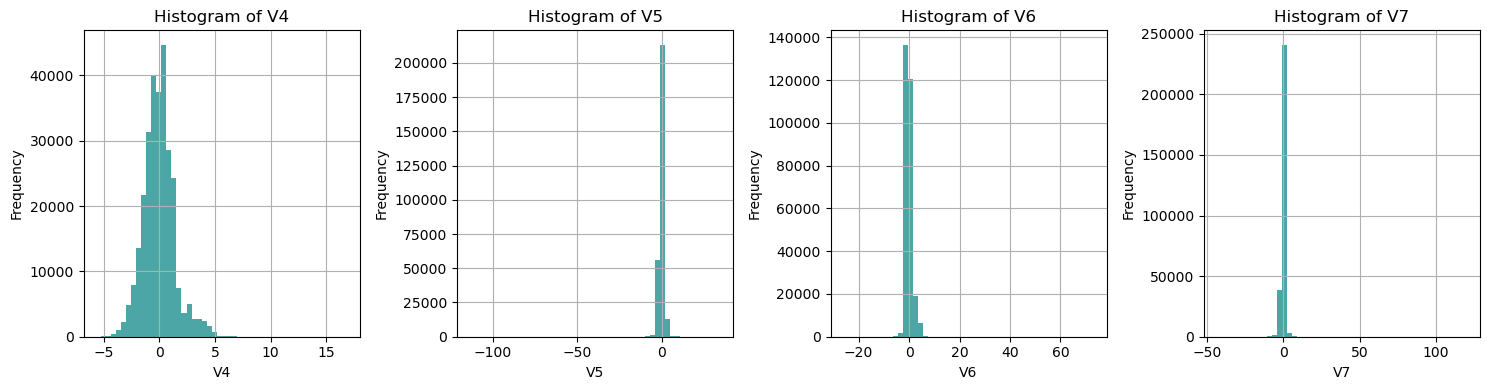

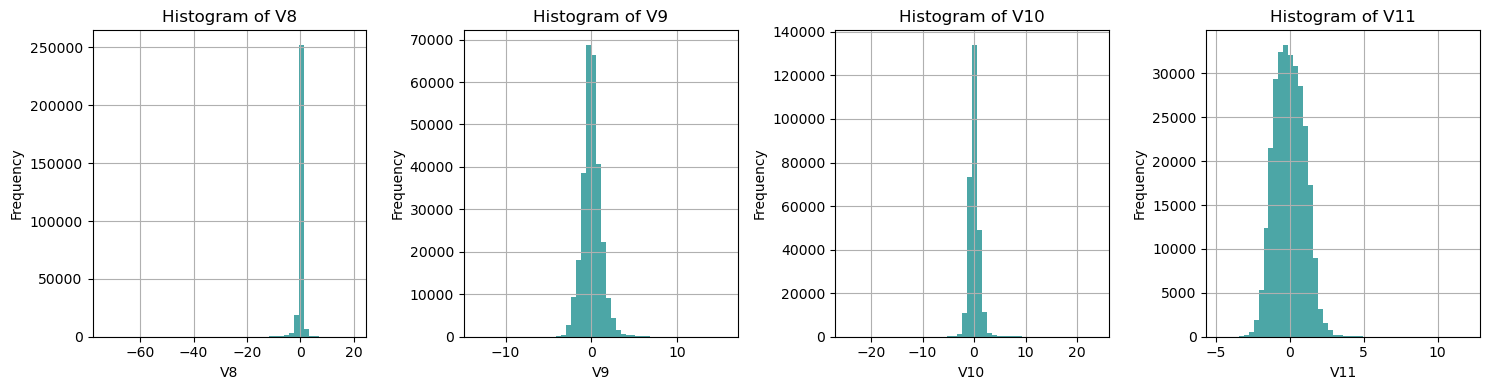

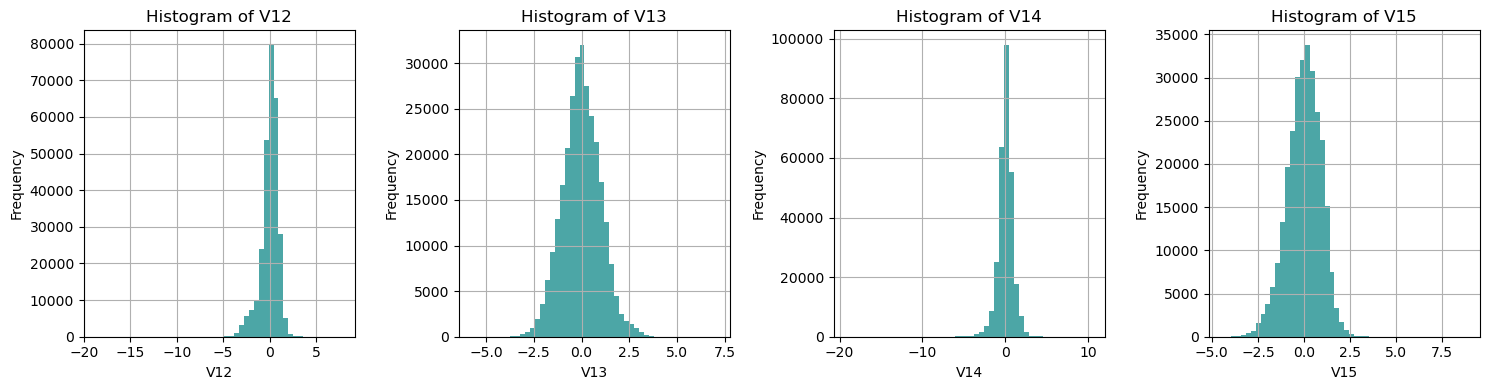

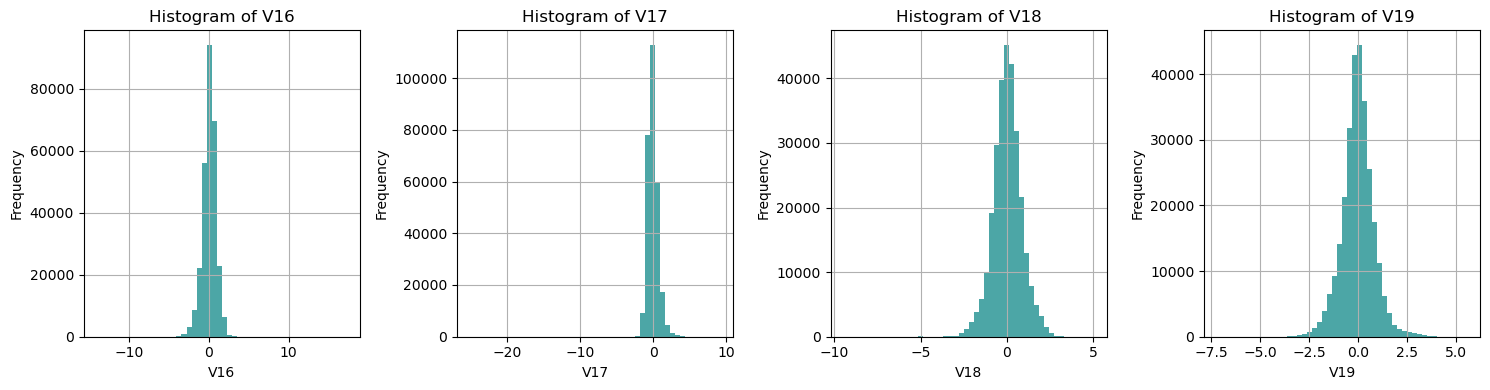

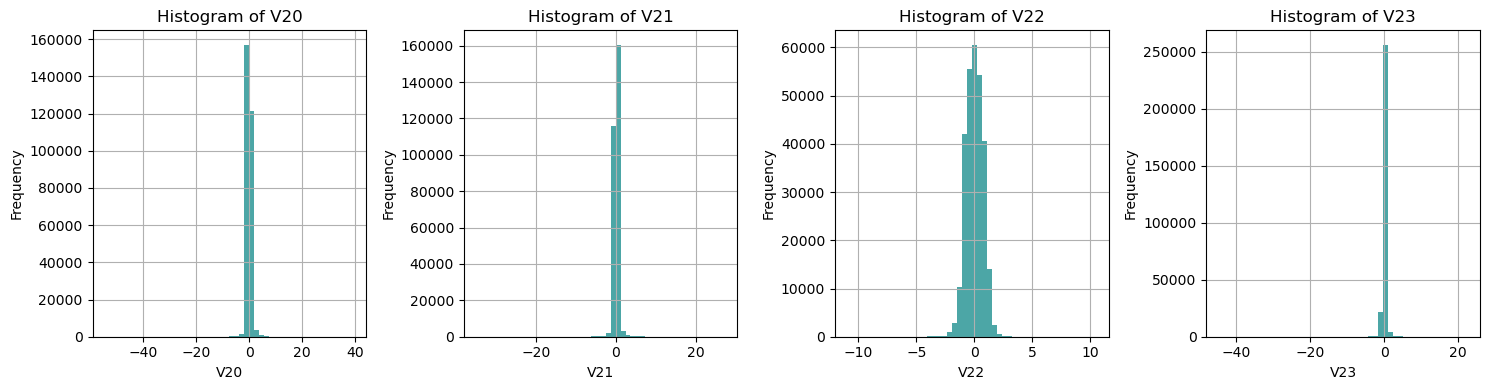

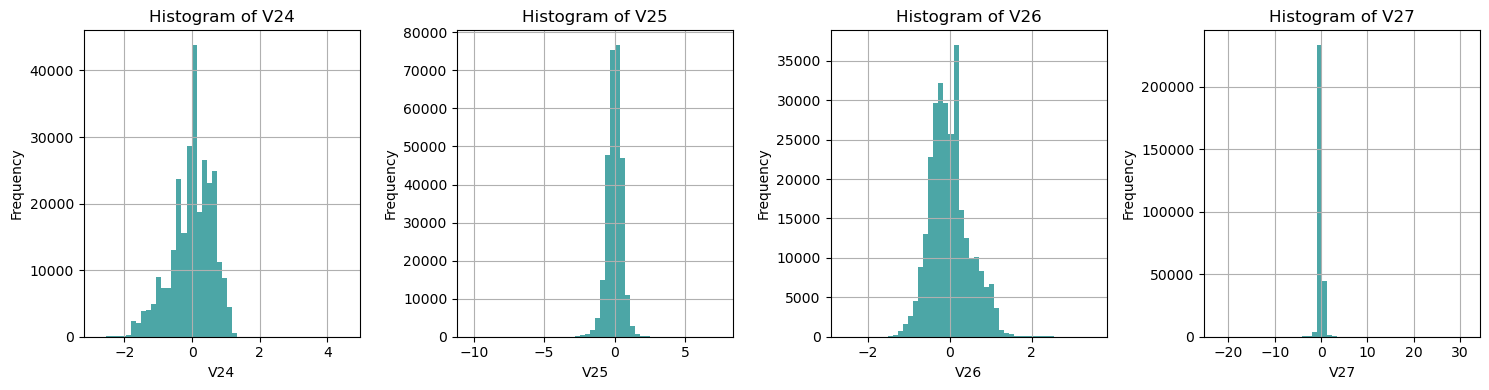

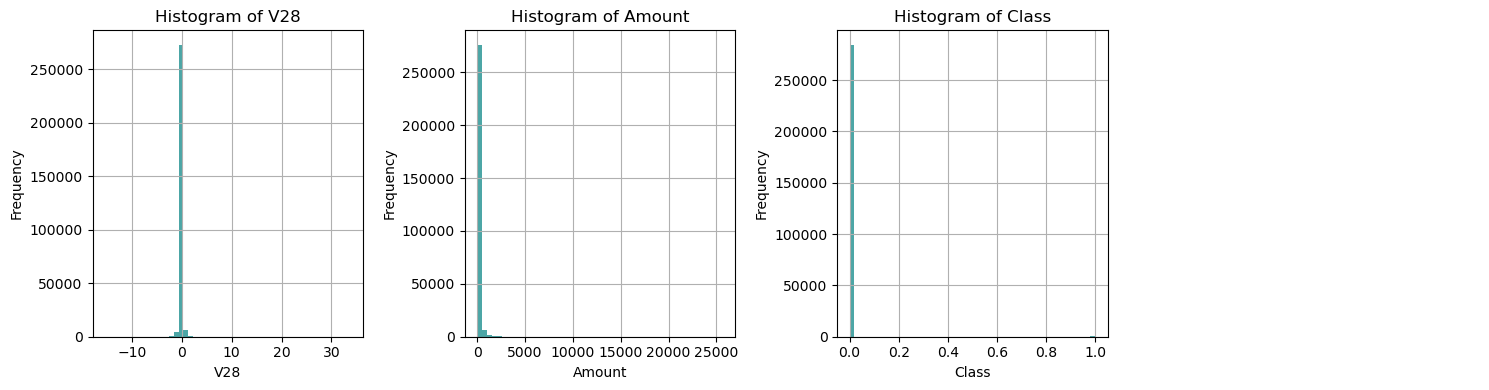

In [7]:
# view histogram data
# Get the list of columns
columns = df.columns

# Loop through the columns in groups of 4
for i in range(0, len(columns), 4):
    # Create a subplot with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first four columns in the group
    for j in range(4):
        if i + j < len(columns):
            axes[j].hist(df[columns[i + j]], bins=50, color='teal', alpha=0.7)
            axes[j].set_title(f"Histogram of {columns[i + j]}")
            axes[j].set_xlabel(columns[i + j])
            axes[j].set_ylabel("Frequency")
            axes[j].grid(True)
        else:
            # If there is no column for this plot, hide the subplot
            axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [8]:
# Exploratory Data Analysis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
from sklearn.preprocessing import RobustScaler

# Separate the features (all columns except 'Class') and target ('Class' column)
features = df.drop(columns=['Class'])  # Features to be scaled
target = df['Class']  # The target column (Class)

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the feature columns
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame, preserving the original column names
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the 'Class' column back to the DataFrame
scaled_df['Class'] = target

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -0.616237 -0.098602  1.228905  0.878152 -0.217859  0.631245   
1 -0.994983  0.524929  0.143100 -0.006970  0.293974  0.087726  0.164395   
2 -0.994972 -0.615587 -1.002407  0.830932  0.251024 -0.344345  1.778007   
3 -0.994972 -0.440239 -0.178789  0.841250 -0.529808  0.033775  1.303832   
4 -0.994960 -0.526089  0.579239  0.713861  0.265632 -0.270695  0.317183   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.177406  0.142432  0.334787  ...  0.026866  0.253109 -0.320791  0.032681   
1 -0.105740  0.117064 -0.164482  ... -0.473332 -0.602719  0.363442 -0.479557   
2  0.668164  0.420388 -1.179796  ...  0.668917  0.714254  2.974603 -0.919589   
3  0.175637  0.662489 -1.076888  ... -0.190105 -0.001408 -0.578786 -1.531963   
4  0.491625 -0.546463  0.700808  ...  0.048266  0.739092 -0.407980  0.126293   

        V25       V26       V27       V28    Amount  Class  
0  0.16

In [10]:
scaled_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.118914,-0.008099,-0.046700,-0.093789,0.012467,0.041684,0.234978,-0.035663,-0.041715,0.041467,...,0.071003,-0.006333,0.036166,-0.051600,-0.024846,0.091805,-0.008291,-0.085674,0.927124,0.001727
std,0.557903,0.875976,1.177594,0.790721,0.889375,1.058858,1.141757,1.100116,2.228372,0.885825,...,1.770910,0.677653,2.017718,0.762671,0.780519,0.849087,2.493334,2.515117,3.495006,0.041527
min,-0.994983,-25.234901,-51.902285,-25.295389,-3.557406,-87.216663,-22.184587,-38.770014,-136.646287,-10.790391,...,-83.903734,-10.215599,-144.743845,-3.623671,-15.440333,-4.494188,-139.401862,-117.657402,-0.307413,0.000000
25%,-0.358210,-0.419712,-0.473542,-0.558111,-0.520605,-0.488876,-0.423451,-0.528388,-0.430967,-0.477061,...,-0.479648,-0.512775,-0.486782,-0.498118,-0.499713,-0.483936,-0.445883,-0.489209,-0.229162,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.641790,0.580288,0.526458,0.441889,0.479395,0.511124,0.576549,0.471612,0.569033,0.522939,...,0.520352,0.487225,0.513218,0.501882,0.500287,0.516064,0.554117,0.510791,0.770838,0.000000
max,1.035022,1.089805,15.683274,4.799177,10.612681,26.739834,63.054506,107.201520,37.286865,12.615676,...,65.656022,9.801353,72.828591,5.721572,11.234373,6.285011,195.267780,257.822531,358.683155,1.000000


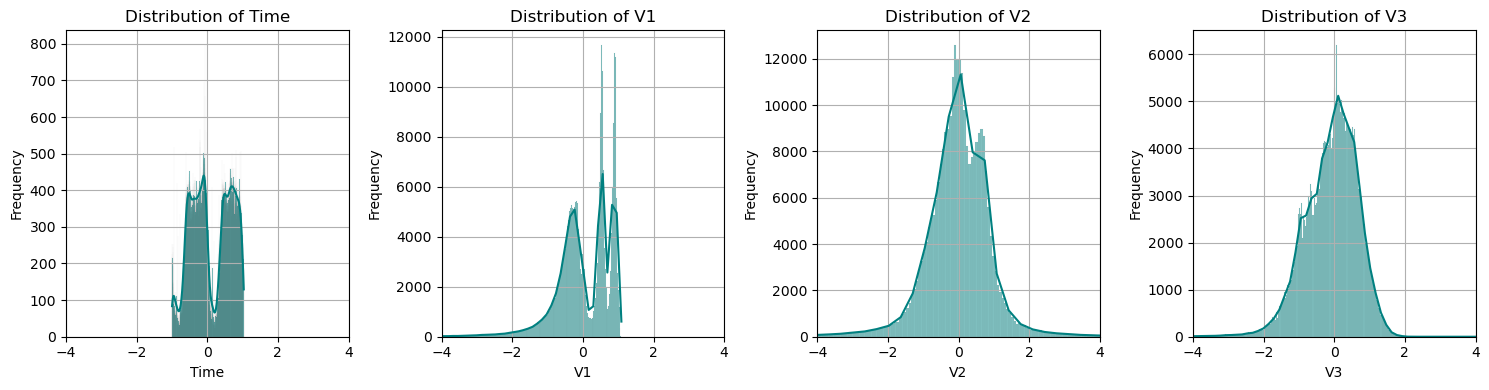

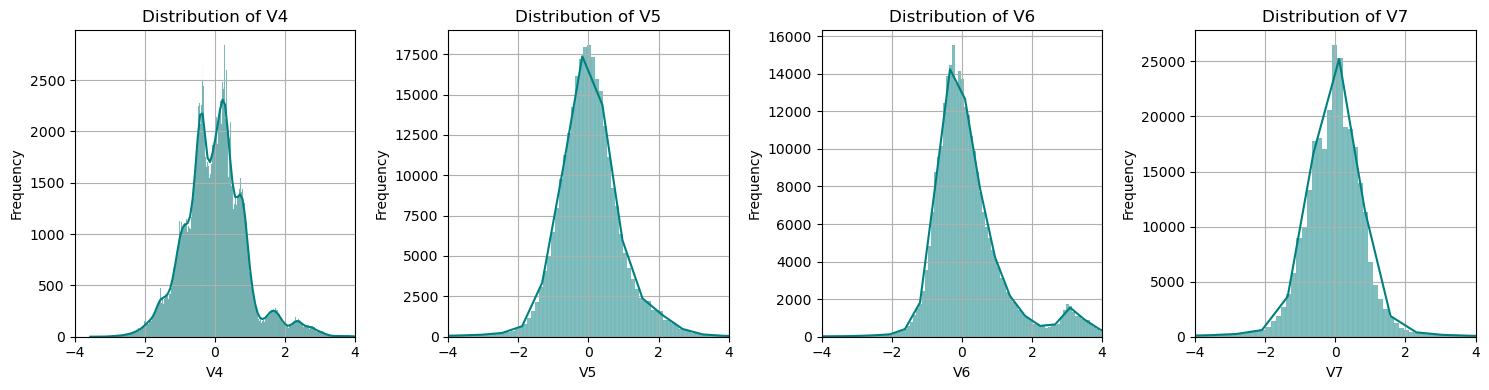

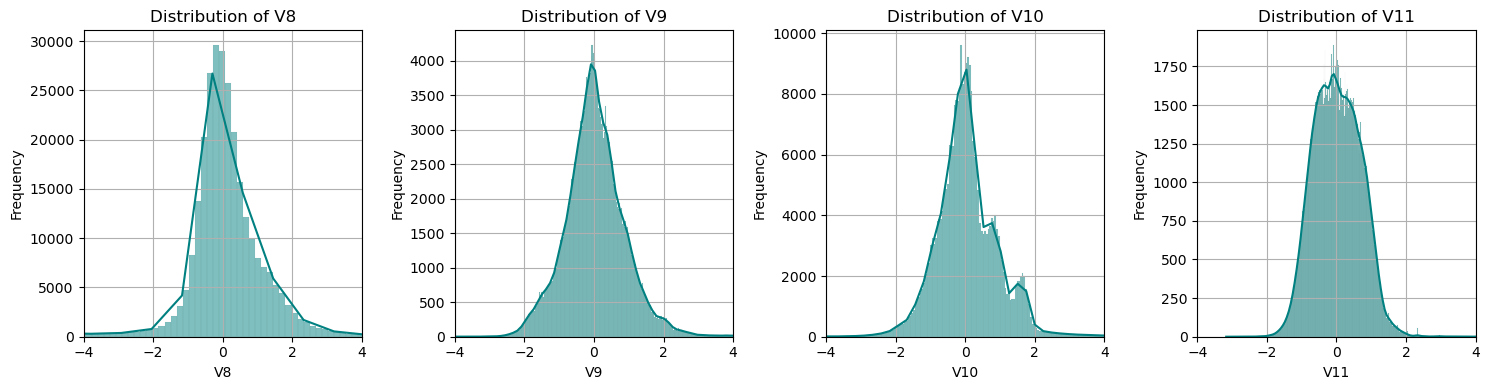

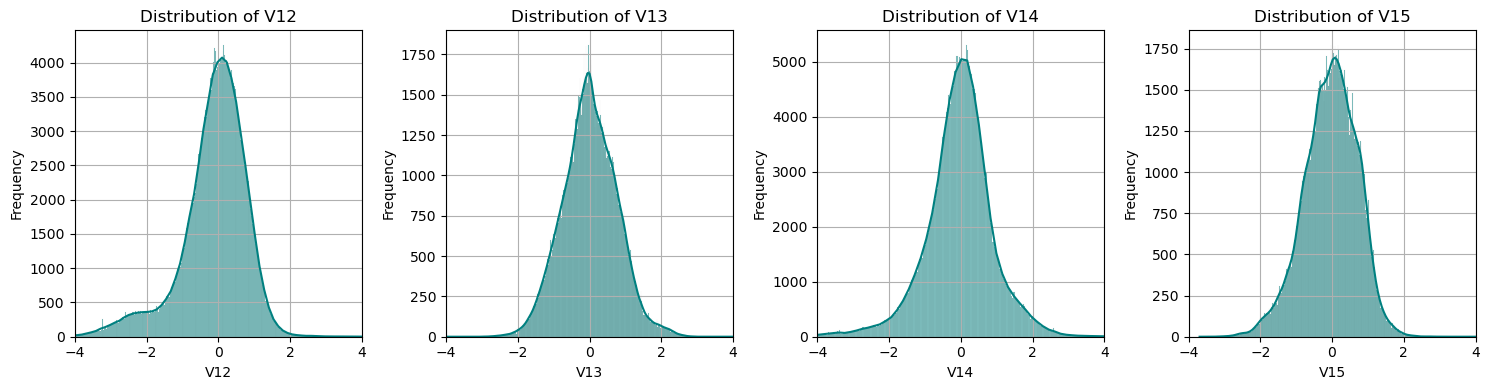

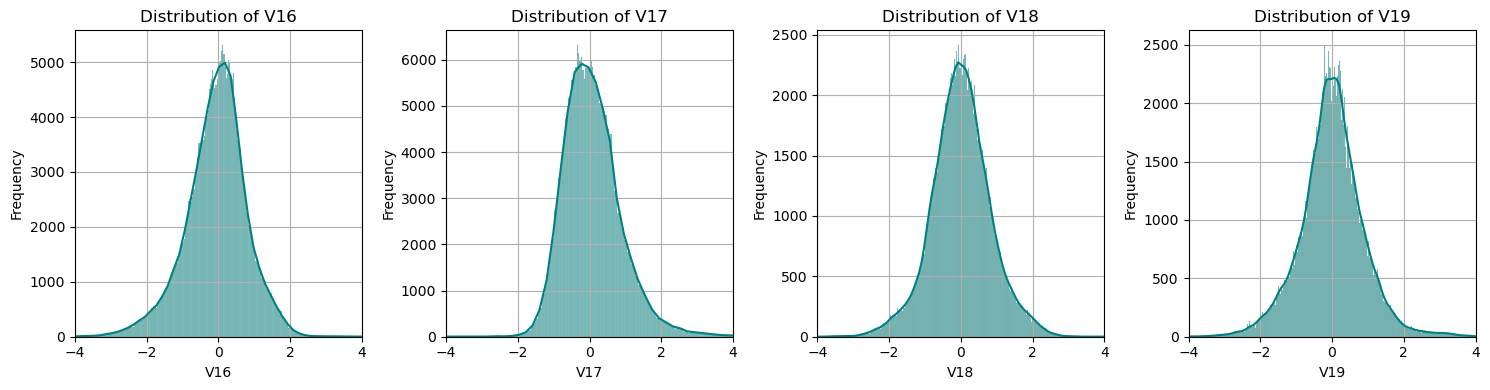

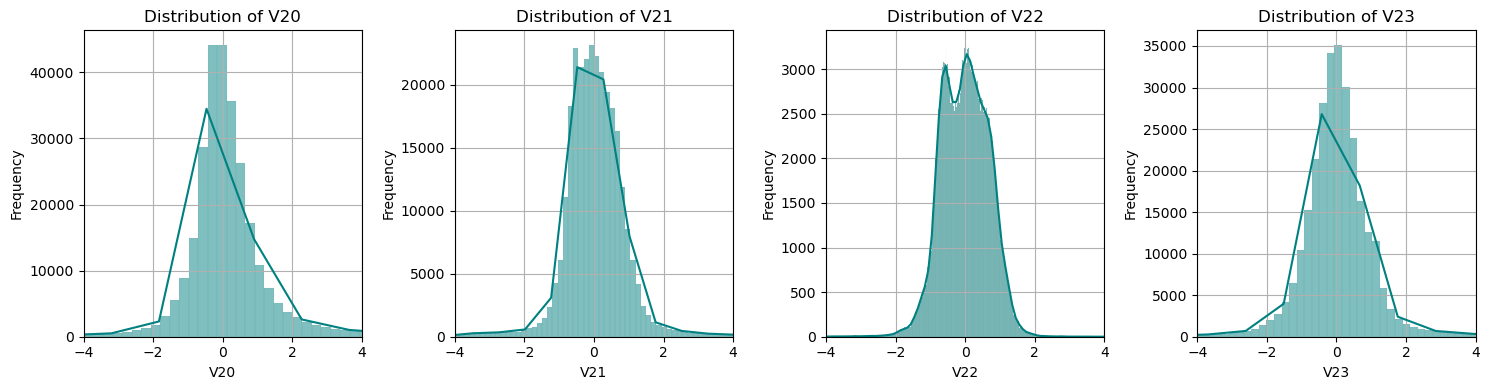

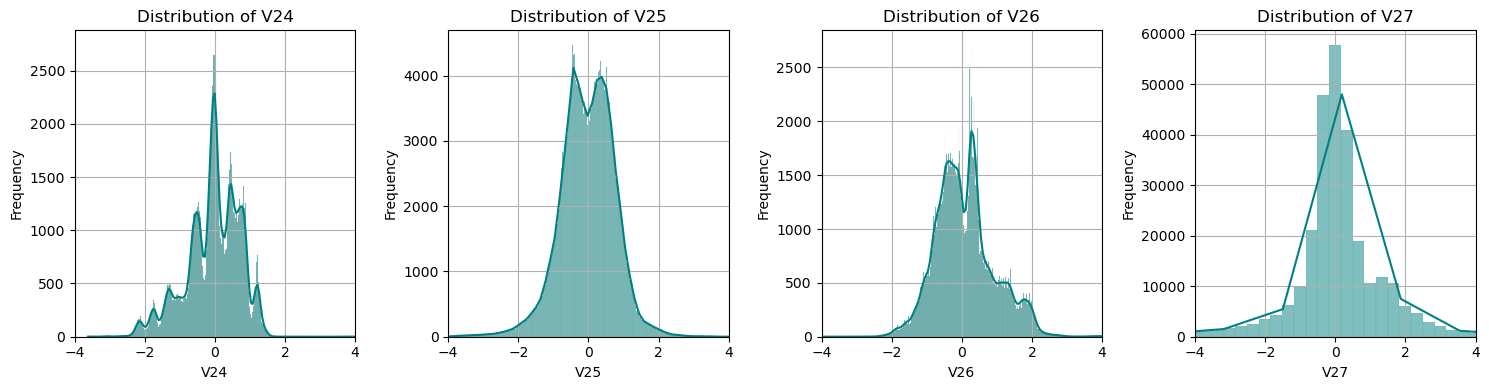

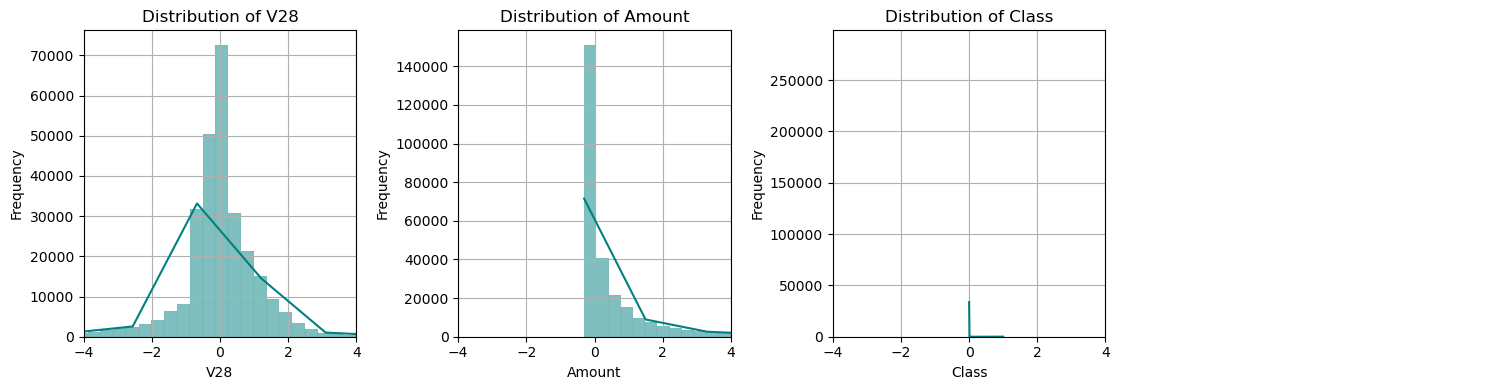

In [11]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress the specific FutureWarning related to use_inf_as_na
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Handle infinite values by replacing them with NaN
scaled_df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Get the list of columns from scaled_df
columns = scaled_df.columns

# Loop through the columns in groups of 4
for i in range(0, len(columns), 4):
    # Create a subplot with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first four columns in the group
    for j in range(4):
        if i + j < len(columns):
            # Remove NaN values before plotting
            data = scaled_df[columns[i + j]].dropna()
            
            sns.histplot(data, bins=1000, kde=True, color='teal', ax=axes[j])
            axes[j].set_title(f"Distribution of {columns[i + j]}")
            axes[j].set_xlabel(columns[i + j])
            axes[j].set_ylabel("Frequency")
            axes[j].grid(True)
            axes[j].set_xlim(-4, 4)  # Set x-limits to see the effect of scaling
        else:
            # If there is no column for this plot, hide the subplot
            axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [12]:
scaled_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Assuming scaled_df is your scaled dataset and 'Class' is the target column
X = scaled_df.drop(columns=['Class'])  # Features
y = scaled_df['Class']  # Target variable (fraud or non-fraud)

# List of class weights for class 1 (fraud) and test set percentages
class_weights = [5, 10, 12, 14, 15, 16, 18, 20, 50, 80, 100]
test_sizes = [0.4, 0.2]  # 60% train / 40% test, and 80% train / 20% test

# Record for storing model performances
results = []

# Total number of loops (iterations) for tracking progress
total_loops = len(class_weights) * len(test_sizes)

# Display the start time before the process begins
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Initialize the progress bar
pbar = tqdm(total=total_loops, desc="Training Progress", ncols=100)

idx = 0
# Loop over different test sizes and class weights
for test_size in test_sizes:
    for weight in class_weights:
        idx = idx + 1
        pbar.set_description(f"Trying {idx}/{total_loops}")
        
        # Split the data with the current test size
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Define class weights
        weight_class = {0: 1, 1: weight}

        # Initialize the RandomForestClassifier with class weights
        clf = RandomForestClassifier(class_weight=weight_class, random_state=42)
        
        # Start timing the training
        start_time = time.time()
        clf.fit(X_train, y_train)  # Train the model
        end_time = time.time()
        duration = end_time - start_time

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Get performance metrics
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
        
        # Capture relevant metrics directly from the classification report
        precision_fraud = report['Fraud']['precision']
        recall_fraud = report['Fraud']['recall']
        
        # Store the result
        results.append({
            'weight': weight,
            'test_size': int(test_size * 100),
            'precision_fraud': precision_fraud,
            'recall_fraud': recall_fraud,
            'confusion_matrix': cm,
            'classification_report': classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']),  # Store the full report
            'duration': f"{int(duration // 60)} minutes and {int(duration % 60)} seconds"
        })

        # Add sleep interval to reduce system load (e.g., for cooling)
        time.sleep(7)  # Sleep for 7 seconds before the next iteration

        # Update the progress bar
        pbar.update(1)

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Lower the precision threshold to 0.97 for top models
top_precision_threshold = 0.97

# Filter models that have precision >= 0.97 for class 1 (fraud)
top_models = [r for r in results if r['precision_fraud'] >= top_precision_threshold]

# Sort by recall of fraud (higher is better) and select the best model
top_model = max(top_models, key=lambda x: x['recall_fraud'], default=None)

# Find the worst model based on recall of fraud (lowest recall)
worst_model = sorted(results, key=lambda x: x['recall_fraud'])[0]

# Display results for the best model
if top_model:
    print("\nBest Model (Precision of Fraud >= 0.97 and Highest Recall of Fraud):")
    print(f"Class 1 Weight = {top_model['weight']}, Test Size = {top_model['test_size']}%")
    print(f"Precision (Fraud): {top_model['precision_fraud']:.2f}, Recall (Fraud): {top_model['recall_fraud']:.2f}")
    print(f"Confusion Matrix:\n{top_model['confusion_matrix']}")
    print(f"Classification Report:\n{top_model['classification_report']}")  # Consistent display of the report
    print(f"Training Duration: {top_model['duration']}")
else:
    print("\nNo models found with Precision of Fraud >= 0.97.")

# Display results for the worst model
print("\nWorst Performing Model (Lowest Recall of Fraud):")
print(f"Class 1 Weight = {worst_model['weight']}, Test Size = {worst_model['test_size']}%")
print(f"Precision (Fraud): {worst_model['precision_fraud']:.2f}, Recall (Fraud): {worst_model['recall_fraud']:.2f}")
print(f"Confusion Matrix:\n{worst_model['confusion_matrix']}")
print(f"Classification Report:\n{worst_model['classification_report']}")
print(f"Training Duration: {worst_model['duration']}")



Overall Process Start Time: 2024-10-10 21:42:18


Trying 22/22: 100%|████████████████████████████████████████████████| 22/22 [40:38<00:00, 110.85s/it]


Overall Process End Time: 2024-10-10 22:22:57
Overall Duration: 40 minutes and 38 seconds

Best Model (Precision of Fraud >= 0.97 and Highest Recall of Fraud):
Class 1 Weight = 10, Test Size = 20%
Precision (Fraud): 0.99, Recall (Fraud): 0.79
Confusion Matrix:
[[56863     1]
 [   21    77]]
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Training Duration: 2 minutes and 9 seconds

Worst Performing Model (Lowest Recall of Fraud):
Class 1 Weight = 5, Test Size = 20%
Precision (Fraud): 0.97, Recall (Fraud): 0.77
Confusion Matrix:
[[56862     2]
 [   23    75]]
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
 


## Random Forest Model Evaluation Result

This markdown provides an explanation of the model's performance, particularly for **The best model: Class 1 Weight = 10, Test Size = 20%**.

### 1. Precision (Fraud) and Recall (Fraud)

- **Precision (Fraud = 0.99)**: 
    - Precision answers the question: "Of all the fraud cases predicted by the model, how many are truly fraud?"
    - In this case, a **precision of 0.99** means that 99% of the predicted fraud cases were actual frauds, while 1% of them were incorrectly predicted as fraud when they were not.
  
- **Recall (Fraud = 0.79)**: 
    - Recall answers the question: "Of all the actual fraud cases, how many were correctly identified by the model?"
    - In this case, a **recall of 0.79** means that the model correctly identified 79% of the actual fraud cases, but it missed 21% of them.

### 2. Confusion Matrix

The confusion matrix shows the number of correct and incorrect predictions for each class (Non-Fraud and Fraud).

```
[[56863     1]
 [   21    77]]
```

- **56863 (True Negatives)**: The model correctly predicted 56,863 Non-Fraud cases.
- **1 (False Positive)**: The model incorrectly predicted 1 case as fraud when it was actually non-fraud.
- **21 (False Negatives)**: The model missed 21 fraud cases.
- **77 (True Positives)**: The model correctly identified 77 fraud cases.

### 3. Classification Report

```
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962
```

- **Non-Fraud**:
  - **Precision**: 1.00 (100% accurate for Non-Fraud cases).
  - **Recall**: 1.00 (Correctly identified all Non-Fraud cases).
  - **Support**: 56,864 (Total number of Non-Fraud cases).

- **Fraud**:
  - **Precision**: 0.99 (99% of predicted fraud cases were actual fraud).
  - **Recall**: 0.79 (The model correctly identified 79% of the actual fraud cases).
  - **F1-Score**: 0.88 (The harmonic mean of precision and recall).

### 4. Overall Metrics

```
    accuracy                           1.00     56962
    macro avg       0.99      0.89      0.94     56962
    weighted avg    1.00      1.00      1.00     56962
```

- **Accuracy**: 1.00 (The model correctly predicted nearly all samples, but the imbalance of the dataset affects this value).

- **Macro Average**: The average precision and recall across both classes without considering class imbalance.

- **Weighted Average**: This takes class imbalance into account and reflects a more accurate measure for imbalanced datasets like this one.

### Summary:
- The model is very **precise** in predicting fraud but has a **moderate recall** (misses 21% of actual fraud cases).
- The high overall **accuracy** is primarily due to the model's strong performance on the majority Non-Fraud class.


In [ ]:
# Further tuning the model


### Further tuning the model

Improving the recall for fraud detection is crucial in fraud detection tasks, as recall focuses on reducing false negatives (i.e., missed fraud cases). Below are several strategies you can apply to improve the recall of your model.

#### 1. Tune the Class Weights Further

We have already used class weights to give more importance to the minority class (fraud). And the recall is still not high enough, we cab try increasing the class weight for the fraud cases (class 1) further. Currently, you are using weights like 5, 10, 12, 14, etc. We can try increasing them even more, e.g., to values like 150, 200, etc.

#### 2. Change the Decision Threshold

By default, classifiers like RandomForest use a probability threshold of 0.5 for classification. You can adjust this threshold to increase the recall. Lowering the threshold will increase the sensitivity of detecting fraud cases at the cost of precision (you might detect more fraud, but you'll also increase false positives).


In [13]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import os

# Get the number of available CPU cores and calculate 50% of it
num_cores = os.cpu_count()  # Get the total number of CPU cores
n_jobs = max(1, num_cores // 2)  # Use 50% of the available cores, ensure at least 1 core

print(f"Total available CPU cores: {num_cores}")
print(f"Using {n_jobs} cores for training.")

# Assuming scaled_df is your scaled dataset and 'Class' is the target column
X = scaled_df.drop(columns=['Class'])  # Features
y = scaled_df['Class']  # Target variable (fraud or non-fraud)

# Define class weights and thresholds to loop through
weight_classes = [150, 200, 500, 1000]
thresholds = [0.3, 0.35, 0.40, 0.45]
test_size = 0.2  # Fixed at 20% test size

# Initialize list to store results
results = []

# Display the start time before the progress bar starts
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Initialize tqdm progress bar
total_iterations = len(weight_classes) * len(thresholds)
pbar = tqdm(total=total_iterations, desc="Model Training Progress", ncols=100)

# Loop over class weights and thresholds
idx = 0
for weight in weight_classes:
    for threshold in thresholds:
        idx = idx + 1
        pbar.set_description(f"Trying {idx}/{total_iterations}")

        # Record the start time for the loop
        loop_start_time = time.time()

        # Split the data with the fixed test size
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Define class weights
        weight_class = {0: 1, 1: weight}

        # Initialize the RandomForestClassifier with class weights and 50% CPU cores
        clf = RandomForestClassifier(class_weight=weight_class, random_state=42, n_jobs=n_jobs)

        # Start timing the training
        start_time = time.time()
        clf.fit(X_train, y_train)  # Train the model
        end_time = time.time()
        duration = end_time - start_time

        # Predict probabilities instead of labels
        y_probs = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)

        # Apply the threshold to classify
        y_pred_threshold = (y_probs >= threshold).astype(int)

        # Get performance metrics (output_dict=True for dictionary output)
        report = classification_report(y_test, y_pred_threshold, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

        # Capture relevant metrics (formatted to 4 decimal places)
        precision_fraud = report['Fraud']['precision']
        recall_fraud = report['Fraud']['recall']
        f1_fraud = report['Fraud']['f1-score']
        accuracy = report['accuracy']

        # Store the result
        results.append({
            'weight_class': weight,
            'threshold': threshold,
            'precision_fraud': float(f"{precision_fraud:.4f}"),
            'recall_fraud': float(f"{recall_fraud:.4f}"),
            'f1_fraud': float(f"{f1_fraud:.4f}"),
            'accuracy': float(f"{accuracy:.4f}"),
            'confusion_matrix': confusion_matrix(y_test, y_pred_threshold),
            'classification_report': classification_report(y_test, y_pred_threshold, target_names=['Non-Fraud', 'Fraud']),
            'duration': f"{int(duration // 60)} minutes and {int(duration % 60)} seconds"
        })

        # Add sleep interval to reduce system load (Optional)
        time.sleep(7)  # Sleep for 7 seconds to reduce continuous CPU usage
        
        # Update progress bar and display loop completion
        pbar.update(1)

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Display the best models with the highest F1-Score (Fraud)
top_model = max(results, key=lambda x: x['f1_fraud'], default=None)
print(f"\nBest Model with the Highest F1-Score (Fraud): Class Weight = {top_model['weight_class']}, Threshold = {top_model['threshold']:.2f}")
print(f"Precision (Fraud): {top_model['precision_fraud']:.4f}, Recall (Fraud): {top_model['recall_fraud']:.4f}, F1-Score (Fraud): {top_model['f1_fraud']:.4f}, Accuracy: {top_model['accuracy']:.4f}")
print(f"Confusion Matrix:\n{top_model['confusion_matrix']}")
print(f"Classification Report:\n{top_model['classification_report']}") 
print(f"Training Duration: {top_model['duration']}")

# Find the worst model based on f1_fraud (lowest f1_fraud)
worst_model = sorted(results, key=lambda x: x['f1_fraud'])[0]

# Display the model with the lowest F1-Score (Fraud)
print(f"\nModel with the Lowest F1-Score (Fraud): Class Weight = {worst_model['weight_class']}, Threshold = {worst_model['threshold']:.2f}")
print(f"Precision (Fraud): {worst_model['precision_fraud']:.4f}, Recall (Fraud): {worst_model['recall_fraud']:.4f}, F1-Score (Fraud): {worst_model['f1_fraud']:.4f}, Accuracy: {worst_model['accuracy']:.4f}")
print(f"Confusion Matrix:\n{worst_model['confusion_matrix']}")
print(f"Classification Report:\n{worst_model['classification_report']}")
print(f"Training Duration: {worst_model['duration']}")


Total available CPU cores: 32
Using 16 cores for training.

Overall Process Start Time: 2024-10-10 23:31:14


Trying 16/16: 100%|█████████████████████████████████████████████████| 16/16 [04:35<00:00, 17.23s/it]


Overall Process End Time: 2024-10-10 23:35:50
Overall Duration: 4 minutes and 35 seconds

Best Model with the Highest F1-Score (Fraud): Class Weight = 200, Threshold = 0.35
Precision (Fraud): 0.9753, Recall (Fraud): 0.8061, F1-Score (Fraud): 0.8827, Accuracy: 0.9996
Confusion Matrix:
[[56862     2]
 [   19    79]]
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Training Duration: 0 minutes and 11 seconds

Model with the Lowest F1-Score (Fraud): Class Weight = 1000, Threshold = 0.30
Precision (Fraud): 0.9195, Recall (Fraud): 0.8163, F1-Score (Fraud): 0.8649, Accuracy: 0.9996
Confusion Matrix:
[[56857     7]
 [   18    80]]
Classification Report:
              precision    recall  f1-score 

In [15]:
# prepare the train data set and test data set

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming scaled_df is your scaled dataset and 'Class' is the target column
X = scaled_df.drop(columns=['Class'])  # Features
y = scaled_df['Class']  # Target variable (fraud or non-fraud)

test_size = 0.2  # Fixed at 20%

# Split the data with the fixed test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [16]:
# evaluating the XGBClassifier model
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Train the XGBoost model
clf_xgb = xgb.XGBClassifier(scale_pos_weight=15, random_state=42)  # Removed use_label_encoder
clf_xgb.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred_xgb = clf_xgb.predict(X_test)

# Confusion Matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Fraud', 'Fraud']))


Confusion Matrix (XGBoost):
[[56862     2]
 [   17    81]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.98      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962




### XGBoost Classifier Model Evaluation Result

#### Summary of the XGBoost Classifier Result:

We achieved excellent performance using **XGBoost** with `scale_pos_weight=15` to handle class imbalance. The confusion matrix and classification report highlight the following key points:

#### Confusion Matrix (XGBoost):
```
[[56862     2]  # Non-Fraud correctly classified: 56862, misclassified: 2
 [   17    81]] # Fraud correctly classified: 81, misclassified: 17
```
- **True Negatives (TN)**: 56862 Non-Fraud cases correctly classified.
- **False Positives (FP)**: 2 Non-Fraud cases incorrectly classified as Fraud.
- **False Negatives (FN)**: 17 Fraud cases incorrectly classified as Non-Fraud.
- **True Positives (TP)**: 81 Fraud cases correctly classified.

#### Classification Report (XGBoost):
```
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.98      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962
```

- **Precision (Fraud)**: 0.98 – This means 98% of the predicted Fraud cases are true Fraud cases.
- **Recall (Fraud)**: 0.83 – This means the model successfully identified 83% of actual Fraud cases.
- **F1-Score (Fraud)**: 0.90 – The harmonic mean of precision and recall shows a balanced performance between these two metrics.
- **Overall Accuracy**: 1.00 – The model correctly classified almost all cases (Non-Fraud and Fraud).

#### Analysis:

1. **High Precision (Fraud)**:
   - The precision for Fraud cases is **0.98**, meaning that almost all the instances predicted as Fraud are true Fraud cases. This is important in fraud detection because a high precision minimizes false positives, which could lead to unnecessary action or blocking legitimate transactions.

2. **Improved Recall (Fraud)**:
   - The recall for Fraud is **0.83**, indicating that 83% of the actual Fraud cases are being detected. This is a significant result for fraud detection systems, where detecting as many fraud cases as possible is crucial to minimize financial loss. However, a recall of 0.83 shows that there is room for improvement to capture more fraud cases (17 fraud cases went undetected).

3. **F1-Score**:
   - The **F1-Score** of 0.90 for Fraud indicates a strong balance between precision and recall. Given the imbalance in the dataset (very few Fraud cases compared to Non-Fraud), this F1 score reflects a robust model performance for fraud detection.

4. **Scale Pos Weight and Class Imbalance**:
   - By setting `scale_pos_weight=15`, you addressed the class imbalance issue effectively. XGBoost places more emphasis on correctly classifying the minority class (Fraud) by penalizing misclassifications more heavily for that class.
   - Without this, the model might have been biased towards predicting the majority class (Non-Fraud), resulting in fewer fraud cases detected.

5. **Minimal False Positives**:
   - Only 2 False Positives were generated, meaning very few legitimate transactions were incorrectly flagged as fraud. This is important to maintain customer satisfaction and avoid unnecessary intervention.

6. **Accuracy**:
   - The overall accuracy is **1.00**, reflecting that the vast majority of transactions (both Fraud and Non-Fraud) were correctly classified. However, in highly imbalanced datasets like this, accuracy can be misleading, so it's important to focus on precision, recall, and F1-Score.

#### Recommendations for Further Improvement:

1. **Boosting Recall**:
   - The recall of 0.83 for Fraud is good, but there are still **17 fraud cases** that went undetected. You might experiment with different values for `scale_pos_weight` (perhaps higher than 15) to further boost recall, potentially catching more fraudulent transactions.

2. **Hyperparameter Tuning**:
   - Fine-tuning other hyperparameters like `max_depth`, `learning_rate`, and `n_estimators` could help to improve the balance between precision and recall, especially for Fraud cases.

3. **Ensemble Methods**:
   - We could explore combining the results from different models (e.g., XGBoost, RandomForest, Logistic Regression) in an ensemble approach to further improve the model’s overall performance.

4. **Anomaly Detection**:
   - In addition to supervised learning approaches like XGBoost, we might also consider unsupervised or semi-supervised anomaly detection techniques to flag transactions that appear suspicious but may not fit the patterns learned from the labeled data.

#### Conclusion:

Overall, the XGBoost classifier is performing exceptionally well with **98% precision** and **83% recall** for detecting fraudulent transactions. The balance between precision and recall is strong, and by using `scale_pos_weight=15`, we've successfully handled the class imbalance challenge.

Further optimization could focus on increasing recall without sacrificing precision, potentially improving the detection of all fraud cases.


In [19]:
# Tuning by SMOTE
# evaluating the XGBClassifier model
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
print("Applying SMOTE to resample the training data...")
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Train the XGBoost model
clf_xgb = xgb.XGBClassifier(scale_pos_weight=15, random_state=42)  # Removed use_label_encoder
clf_xgb.fit(X_train_sm, y_train_sm)

# Evaluate XGBoost model
y_pred_xgb = clf_xgb.predict(X_test)

# Confusion Matrix
print("Confusion Matrix (XGBoost with SMOTE):")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report (XGBoost with SMOTE):")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Fraud', 'Fraud']))

Applying SMOTE to resample the training data...
Confusion Matrix (XGBoost with SMOTE):
[[56819    45]
 [   12    86]]

Classification Report (XGBoost with SMOTE):
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.66      0.88      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.94      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import os
import psutil
import xgboost as xgb
from tqdm import tqdm

# Apply SMOTE to the training set
print("Applying SMOTE to resample the training data...")
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Get the number of available CPU cores and calculate 50% of them
num_cores = psutil.cpu_count(logical=False)  # Total physical cores)
p = psutil.Process()
available_cores = list(range(num_cores // 2))  # Limit to 50% of physical cores
p.cpu_affinity(available_cores)  # Set affinity to limit CPU usage

# Define n_jobs based on the reduced number of cores
n_jobs = len(available_cores)

print(f"Total available CPU cores: {num_cores}")
print(f"Using {n_jobs} physical cores for training.")

# Display the start time before the progress bar starts
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Define parameter grid for GridSearchCV
param_grid = {
    'scale_pos_weight': [5, 10, 200, 100],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.1, 0.3, 0.5],  # Ensure gamma values are in lists
    'learning_rate': [0.01, 0.03, 0.05],
}

# Initialize XGBClassifier with limited CPU usage
clf_xgb = xgb.XGBClassifier(random_state=42, n_jobs=n_jobs)  # Limit XGBoost to use the reduced set of cores

# Initialize tqdm progress bar
total_fits = len(param_grid['scale_pos_weight']) * len(param_grid['max_depth']) * len(param_grid['min_child_weight']) * len(param_grid['gamma']) * len(param_grid['learning_rate']) * 5  # 5-fold cross-validation for each candidate
pbar = tqdm(total=total_fits, desc="GridSearchCV Progress", ncols=100)

# Custom scoring function for F1-score (Fraud class)
f1_fraud_scorer = make_scorer(f1_score, pos_label=1)  # Optimize for the F1-score of Fraud class (class 1)

# Perform grid search with progress tracking
grid_search = GridSearchCV(estimator=clf_xgb, param_grid=param_grid, scoring=f1_fraud_scorer, cv=5, verbose=1, n_jobs=n_jobs)

# Start fitting the model
grid_search.fit(X_train_sm, y_train_sm)

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on the test set
y_pred_xgb = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix (Tuned XGBoost with SMOTE):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (Tuned XGBoost with SMOTE):")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Fraud', 'Fraud']))


Applying SMOTE to resample the training data...
Total available CPU cores: 24
Using 12 physical cores for training.

Overall Process Start Time: 2024-10-11 14:26:45


GridSearchCV Progress:   0%|                                               | 0/1620 [00:00<?, ?it/s]

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
# Tuning by SMOTE
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import time
import os
from datetime import datetime

# Function to check if XGBoost can use CUDA
def is_xgboost_cuda_available():
    try:
        # Check if XGBoost's GPU data structure exists
        xgb_runnable = xgb.DeviceQuantileDMatrix is not None
        return xgb_runnable
    except AttributeError:
        return False

# Decide if we use GPU based on XGBoost's CUDA availability
if is_xgboost_cuda_available():
    device_param = 'cuda'
    print("XGBoost CUDA is available. Using GPU to speed up training.")
else:
    device_param = None
    print("XGBoost CUDA is not available. Using CPU for training.")

# Apply SMOTE to the training set
print("Applying SMOTE to resample the training data...")
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Prepare DMatrix (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train_sm, label=y_train_sm)
dtest = xgb.DMatrix(X_test)

# Define parameter grid for grid search
param_grid = {
    'scale_pos_weight': [5, 10, 12, 15],   
    'learning_rate': [0.03, 0.05],         
    'max_depth': [7, 9],                   
    'gamma': [0.1, 0.3],  
    'subsample': [0.8, 0.85],              
    'colsample_bytree': [0.8, 0.85],       
}

# Track results
best_f1_score = 0
best_params = {}
best_classification_report = ""
results = []

# Number of boosting rounds (trees)
num_boost_round = 250

# Perform grid search over parameter combinations
grid = ParameterGrid(param_grid)
total_combinations = len(grid)

# Display the start time before the progress bar starts
overall_start_time = time.time()
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Initialize a progress bar
pbar = tqdm(total=total_combinations, desc="Grid Search Progress", ncols=100)

# Loop through the grid
for idx, params in enumerate(grid):
    pbar.set_description(f"Trying {idx+1}/{total_combinations}: {params}")
    
    # Train the XGBoost model with the updated tree_method and device parameters
    bst_params = {**params, 'objective': 'binary:logistic', 'tree_method': 'hist', 'eval_metric': 'logloss'}
    
    if device_param == 'cuda':
        bst_params['device'] = 'cuda'

    bst = xgb.train(
        bst_params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, 'train')],
        verbose_eval=False
    )
    
    # Adjust threshold for classification
    threshold = 0.5
    y_pred_probs = bst.predict(dtest)
    y_pred_sm = (y_pred_probs >= threshold).astype(int)
    
    # Calculate performance metrics
    report = classification_report(y_test, y_pred_sm, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
    confusion = confusion_matrix(y_test, y_pred_sm)
    precision_fraud = report['Fraud']['precision']
    recall_fraud = report['Fraud']['recall']
    f1_fraud = report['Fraud']['f1-score']
    accuracy = report['accuracy']

    # Save the results
    results.append({
        'params': params,
        'precision_fraud': precision_fraud,
        'recall_fraud': recall_fraud,
        'f1_fraud': f1_fraud,
        'accuracy': float(f"{accuracy:.4f}"),
        'confusion_matrix': confusion,
        'classification_report': classification_report(y_test, y_pred_sm, target_names=['Non-Fraud', 'Fraud'])
    })
    
    # Track the best model based on F1-score for fraud
    if f1_fraud > best_f1_score:
        best_f1_score = f1_fraud
        best_params = params
        best_classification_report = classification_report(y_test, y_pred_sm, target_names=['Non-Fraud', 'Fraud'])
    
    # Add a sleep interval to allow GPU to cool down
    time.sleep(7.0)
    
    # Update progress bar with the current step
    pbar.update(1)

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Display the best models with the highest F1-Score (Fraud)
top_model = max(results, key=lambda x: x['f1_fraud'], default=None)
print(f"\nBest Model with the Highest F1-Score (Fraud):")
print(f"Params: {top_model['params']}")
print(f"Precision (Fraud): {top_model['precision_fraud']:.4f}, Recall (Fraud): {top_model['recall_fraud']:.4f}, F1-Score (Fraud): {top_model['f1_fraud']:.4f}, Accuracy: {top_model['accuracy']:.4f}")
print(f"Confusion Matrix:\n{top_model['confusion_matrix']}")
print(f"Classification Report:\n{top_model['classification_report']}") 
print(f"Training Duration: {top_model['overall_duration']}")

# Find the worst model based on f1_fraud (lowest f1_fraud)
worst_model = sorted(results, key=lambda x: x['f1_fraud'])[0]

# Display the model with the lowest F1-Score (Fraud)
print(f"\nModel with the Lowest F1-Score (Fraud):")
print(f"Params: {worst_model['params']}")
print(f"Precision (Fraud): {worst_model['precision_fraud']:.4f}, Recall (Fraud): {worst_model['recall_fraud']:.4f}, F1-Score (Fraud): {worst_model['f1_fraud']:.4f}, Accuracy: {worst_model['accuracy']:.4f}")
print(f"Confusion Matrix:\n{worst_model['confusion_matrix']}")
print(f"Classification Report:\n{top_model['classification_report']}") 
print(f"Training Duration: {worst_model['overall_duration']}")


In [ ]:
# Try Ensemble Models (Bagging or Boosting)
# Ensemble methods such as bagging (e.g., RandomForest) or boosting (e.g., XGBoost) 
# can improve recall by combining multiple weak models to form a stronger predictive model.
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import time
import os

# Get the number of available CPU cores and calculate 50% of it
num_cores = os.cpu_count()  # Get the total number of CPU cores
n_jobs = max(1, num_cores // 2)  # Use 50% of the available cores, ensure at least 1 core

print(f"Total available CPU cores: {num_cores}")
print(f"Using {n_jobs} cores for training.")

# Define Bagging with RandomForest as base estimator
# Limiting CPU cores to 50% of the available cores using n_jobs
clf_bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42, n_jobs=n_jobs)

# Initialize a progress bar for training
pbar = tqdm(total=100, desc="Training Bagging Classifier", ncols=100)

# Train the Bagging classifier using 50% of the available cores
clf_bagging.fit(X_train, y_train)

# Update progress bar
pbar.update(50)  # Simulate 50% progress during training

# Evaluate the model
y_pred_bagging = clf_bagging.predict(X_test)

# Finish progress
pbar.update(50)
pbar.close()

# Display Confusion Matrix
print("Confusion Matrix (Bagging):")
print(confusion_matrix(y_test, y_pred_bagging))

# Display Classification Report
print("\nClassification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging, target_names=['Non-Fraud', 'Fraud']))
